In [1]:
import pickle
import pycaret
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tsfresh import select_features
from pycaret.classification import *
from tsfresh import extract_features
from tsfresh import extract_relevant_features
from sklearn.ensemble import ExtraTreesClassifier
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.feature_extraction import MinimalFCParameters, EfficientFCParameters
from notebooks_preprocessing_and_dataframe_creation import preprocessing_functions

In [2]:
cmap='seismic'
sns.set_palette(sns.color_palette(cmap))

In [3]:
metric = 'AUC' # F1 or AUC

In [4]:
df = pd.read_pickle('../data/unified_dataframe/data_unprocessed.pkl')
df

,id,date,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,responsiveness_points_percentage,daily_temperature_variation,badgeType,calories,filteredDemographicVO2Max,distance,activityType,bpm,lightly_active_minutes,moderately_active_minutes,very_active_minutes,sedentary_minutes,mindfulness_session,scl_avg,resting_hr,sleep_duration,minutesToFallAsleep,minutesAsleep,minutesAwake,minutesAfterWakeup,sleep_efficiency,sleep_deep_ratio,sleep_wake_ratio,sleep_light_ratio,sleep_rem_ratio,steps,minutes_in_default_zone_1,minutes_below_default_zone_1,minutes_in_default_zone_2,minutes_in_default_zone_3,age,gender,bmi,heart_rate_alert,startTime,endTime,label_ttm_stage,label_breq_self_determination,label_sema_negative_feelings,label_ipip_extraversion_category,label_ipip_agreeableness_category,label_ipip_conscientiousness_category,label_ipip_stability_category,label_ipip_intellect_category,label_stai_stress_category,label_panas_negative_affect
0,621e2e8e67b776a24055b564,2021-05-24,34.137687,57.432,89.603,NaN,14.8,78.0,0.833333,0.675,0.866667,-1.788325,None,2351.59,62.79210,6517.5,[Walk],71.701565,149.0,24.0,33.0,713.0,False,NaN,62.073070,31260000.0,0.0,445.0,76.0,0.0,93.0,1.243243,0.987013,0.921642,1.341772,8833.0,83.0,1349.0,0.0,0.0,<30,MALE,<19,None,2021-05-24T00:40:00.000,2021-05-24T09:21:00.000,Maintenance,intrinsic_regulation,NaN,LOW,LOW,HIGH,HIGH,AVERAGE,NaN,NaN
1,621e328667b776a240281372,2021-05-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,2619.85,41.38447,6568.9,[Walk],83.919698,132.0,7.0,30.0,1271.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8550.0,278.0,766.0,29.0,1.0,>=30,MALE,>=30,None,NaN,NaN,Maintenance,intrinsic_regulation,NaN,HIGH,AVERAGE,HIGH,LOW,LOW,NaN,NaN
2,621e326767b776a24012e179,2021-05-24,NaN,46.120,53.968,95.3,14.4,80.0,0.666667,0.925,0.766667,-4.129593,None,2204.50,52.76058,11283.7,[Walk],68.275766,278.0,41.0,67.0,616.0,False,NaN,52.516339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16992.0,131.0,1225.0,0.0,0.0,<30,FEMALE,<19,None,NaN,NaN,Maintenance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,621e332267b776a24092a584,2021-05-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,3792.13,53.53183,16776.8,[Walk],78.842893,190.0,79.0,108.0,1063.0,False,NaN,60.977217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21284.0,175.0,1130.0,9.0,0.0,<30,MALE,21.0,None,NaN,NaN,Maintenance,identified_regulation,NaN,LOW,LOW,LOW,AVERAGE,HIGH,NaN,NaN
4,621e333567b776a240a0c217,2021-05-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[LIFETIME_DISTANCE],NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<30,MALE,21.0,None,NaN,NaN,Contemplation,intrinsic_regulation,NaN,AVERAGE,HIGH,AVERAGE,LOW,LOW,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7799,621e30b267b776a240c5e13f,2022-01-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,1554.15,42.17696,209.4,None,89.131283,33.0,0.0,0.0,1407.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,287.0,19.0,126.0,0.0,0.0,<30,FEMALE,21.0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7800,621e312a67b776a240164d59,2022-01-17,34.237581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.165995,[DAILY_FLOORS],1602.67,47.22494,3806.9,None,67.473381,125.0,27.0,5.0,116.0,False,NaN,58.157746,25800000.0,0.0,379.0,51.0,1.0,94.0,0.835443,0.728571,0.796667,0.902439,4966.0,114.0,563.0,0.0,0.0,>=30,MALE,25.0,None,2022-01-17T00:45:00.000,2022-01-17T07:55:00.000,Contemplation,intrinsic_regulation,NaN,AVERAGE,LOW,HIGH,AVERAGE,LOW,NaN,NaN
7801,621e309b67b776a240b532b0,2022-01-17,31.815133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.999818,[DAILY_FLOORS],2887.52,49.82090,9000.0,"[Sport, Walk]",74.452687,164.0,37.0,63.0,875.0,False,NaN,64.007904,18060000.0,0.0,276.0,25.0,0.0,99.0,0.708333,0.609756,0.714286,1.066667,12096.0,129.0

In [5]:
df_pre = pd.read_pickle('../data/unified_dataframe/data_preprocessed.pkl')
df_pre

,id,date,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,responsiveness_points_percentage,daily_temperature_variation,calories,filteredDemographicVO2Max,distance,bpm,lightly_active_minutes,moderately_active_minutes,very_active_minutes,sedentary_minutes,mindfulness_session,scl_avg,resting_hr,sleep_duration,minutesToFallAsleep,minutesAsleep,minutesAwake,minutesAfterWakeup,sleep_efficiency,sleep_deep_ratio,sleep_wake_ratio,sleep_light_ratio,sleep_rem_ratio,steps,minutes_in_default_zone_1,minutes_below_default_zone_1,minutes_in_default_zone_2,minutes_in_default_zone_3,age,gender,bmi,label_ttm_stage,label_breq_self_determination,label_sema_negative_feelings,label_ipip_extraversion_category,label_ipip_agreeableness_category,label_ipip_conscientiousness_category,label_ipip_stability_category,label_ipip_intellect_category,label_stai_stress_category,label_panas_negative_affect,month_sin,weekday_sin,week_sin,day_sin,month_cos,weekday_cos,week_cos,day_cos,DAILY_FLOORS,DAILY_STEPS,GOAL_BASED_WEIGHT_LOSS,LIFETIME_DISTANCE,LIFETIME_FLOORS,LIFETIME_WEIGHT_GOAL_SETUP,Aerobic Workout,Bike,Bootcamp,Circuit Training,Elliptical,Hike,Interval Workout,Martial Arts,Run,Spinning,Sport,Swim,Treadmill,Walk,Weights,Workout,Yoga/Pilates,wear_day,early_features,used_during_night,different_activity_types,different_badge_types,is_index,iv_index,sri_index,sjl_index,mode_startTime,mode_endTime,mode_startTime_sin,mode_startTime_cos,mode_endTime_sin,mode_endTime_cos,isp_index,steps_is_index,steps_iv_index,steps_sri_index,steps_isp_index,exercise_is_index,exercise_iv_index,exercise_sri_index,stress_quantile,user_stress_quantile,average_sleep_duration,average_steps,is_weekend,is_holiday,startDay_sin,startDay_cos,startWeek_sin,startWeek_cos,startWeekday_sin,startWeekday_cos,startMonth_sin,startMonth_cos,startYear_sin,startYear_cos,endDay_sin,endDay_cos,endWeek_sin,endWeek_cos,endWeekday_sin,endWeekday_cos,endMonth_sin,endMonth_cos,endYear_sin,endYear_cos,startHour_sin,startHour_cos,endHour_sin,endHour_cos,Steps_hour0,Steps_hour1,Steps_hour2,Steps_hour3,Steps_hour4,Steps_hour5,Steps_hour6,Steps_hour7,Steps_hour8,Steps_hour9,Steps_hour10,Steps_hour11,Steps_hour12,Steps_hour13,Steps_hour14,Steps_hour15,Steps_hour16,Steps_hour17,Steps_hour18,Steps_hour19,Steps_hour20,Steps_hour21,Steps_hour22,Steps_hour23
0,621e2e8e67b776a24055b564,2021-05-24,34.137687,57.432,89.603,95.9,14.8,78.0,0.833333,0.675,0.866667,-1.788325,2351.59,62.79210,6517.5,71.701565,149.0,24.0,33.0,713.0,0.0,10.907065,62.073070,31260000.0,0.0,445.0,76.0,0.0,93.0,1.243243,0.987013,0.921642,1.341772,8833.0,83.0,1349.0,0.0,0.0,0.0,0.0,Underweight,Maintenance,intrinsic_regulation,NaN,LOW,LOW,HIGH,HIGH,AVERAGE,Below average,Below average,-0.866025,0.000000,3.090170e-01,-0.988468,0.5,1.000000,0.951057,0.151428,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0,0.873563,1,4,0.930443,0.343581,90.495130,1.091284,23.0,9.0,0.382683,-0.92388,-3.826834e-01,-0.92388,0.945035,0.287117,1.655374,89.963574,0.381108,0.224056,2.003963,77.127735,2,1,3.255517e+07,8892.885057,0.0,0.0,0.060330,0.998178,-0.281733,0.959493,0.000000,1.000000,0.012703,0.999919,-0.908669,0.417518,0.060330,0.998178,-0.0,1.0,0.000000,1.000000,0.012703,0.999919,-0.908669,0.417518,0.000000,1.000000,0.022699,0.999742,134.0,0.0,0.0,15.0,0.0,0.0,39.0,0.0,7.0,10.0,2626.0,992.0,429.0,29.0,191.0,33.0,342.0,1712.0,1838.0,160.0,155.0,37.0,31.0,53.0
1,621e2e8e67b776a24055b564,2021-05-25,33.794544,57.681,94.303,95.9,15.8,80.0,0.833333,0.725,0.866667,-2.462709,2332.08,62.67912,7178.6,70.579300,132.0,25.0,31.0,704.0,0.0,10.907065,62.121476,32880000.0,0.0,460.0,88.0,0.0,94.0,1.466667,1.142857,0.947566,1.197531,9727.0,56.0,1374.0,4.0,0.0,0.0,0.0,Underweight,Maintenance,intrinsic_regulation,1.0,LOW,LOW,HIGH,HIGH,AVERAGE,Below average,Below average,-0.866025,0.781831,3.090170e-01,-0.937752,0.5,0.623490,0.951057,0.347305,0.0,0.0,0.0,0.0,0.0,0.0,0

# Predict personality intellect

In [6]:
intellect = df.drop(columns=['date','startTime', 'endTime', 'label_sema_negative_feelings', 'label_ipip_agreeableness_category', 'label_ipip_extraversion_category','label_ipip_stability_category', 'label_ipip_conscientiousness_category', 'label_stai_stress_category', 'label_panas_negative_affect', 'label_ttm_stage', 'label_breq_self_determination'])

In [7]:
train_data, test_data = preprocessing_functions.train_test_split_per_user(intellect)
fold_groups = train_data.id
train_data = train_data.drop(columns=['id'])
test_data = test_data.drop(columns=['id'])

In [8]:
s = setup(data=train_data, target='label_ipip_intellect_category', silent=True, session_id=123,
          fold_strategy='groupkfold', fold=3,  fold_groups=fold_groups, test_data=test_data)

,Description,Value
0,session_id,123
1,Target,label_ipip_intellect_category
2,Target Type,Multiclass
3,Label Encoded,"AVERAGE: 0, HIGH: 1, LOW: 2"
4,Original Data,"(5199, 43)"
5,Missing Values,True
6,Numeric Features,33
7,Categorical Features,9
8,Ordinal Features,False
9,High Cardinality Features,False


In [9]:
best = compare_models(sort = '%s'%metric) # change to F1 and AUC

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.2894,0.5135,0.3334,0.3671,0.2754,-0.0054,-0.0046,0.6967
dummy,Dummy Classifier,0.3113,0.5000,0.3333,0.1078,0.1571,0.0000,0.0000,0.0500
dt,Decision Tree Classifier,0.2688,0.4681,0.2742,0.3175,0.2445,-0.0618,-0.0770,0.0600
knn,K Neighbors Classifier,0.3208,0.4677,0.3141,0.3250,0.3166,-0.0253,-0.0263,0.7400
lightgbm,Light Gradient Boosting Machine,0.2457,0.4512,0.2414,0.3019,0.2327,-0.1224,-0.1292,0.4167
qda,Quadratic Discriminant Analysis,0.2381,0.4349,0.2576,0.2271,0.1789,-0.1142,-0.1172,0.0733
lr,Logistic Regression,0.2582,0.4077,0.3445,0.1661,0.1568,0.0093,0.0125,0.9867
gbc,Gradient Boosting Classifier,0.2188,0.3847,0.2101,0.2768,0.2225,-0.1347,-0.1523,1.1933
lda,Linear Discriminant Analysis,0.2389,0.3770,0.2521,0.2371,0.2202,-0.1442,-0.1486,0.0667
rf,Random Forest Classifier,0.2243,0.3734,0.2327,0.3315,0.2179,-0.1331,-0.1364,0.1400


In [10]:
lr = create_model('lr', fold=3)
tuned_lr = tune_model(lr)
d=pd.DataFrame({'Feature': get_config('X_train').columns, 'Value' : abs(tuned_lr.coef_[0])}).sort_values(by='Value', ascending=False)
d.reset_index(inplace=True)
d=d.head(15)
d = d.drop(columns='index')
d['Label'] = 'intellect'
d = d[['Label', 'Feature', 'Value']]
d.to_pickle('../data/feature_importances/intellect2.pkl')
d

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.3380,0.4340,0.3516,0.3496,0.3393,-0.0029,-0.0029
1,0.1952,0.4542,0.3333,0.0381,0.0637,0.0000,0.0000
2,0.4169,0.4414,0.3333,0.1738,0.2453,0.0000,0.0000
Mean,0.3167,0.4432,0.3394,0.1872,0.2161,-0.0010,-0.0010
Std,0.0918,0.0084,0.0086,0.1275,0.1144,0.0014,0.0014


,Label,Feature,Value
0,intellect,sleep_duration,9.324772e-10
1,intellect,steps,4.516668e-12
2,intellect,distance,2.637410e-12
3,intellect,calories,8.840044e-13
4,intellect,sedentary_minutes,4.982402e-13
5,intellect,minutes_in_default_zone_1,3.033746e-13
6,intellect,lightly_active_minutes,2.980804e-13
7,intellect,minutes_below_default_zone_1,1.057235e-13
8,intellect,stress_score,3.466750e-14
9,intellect,moderately_active_minutes,3.341166e-14


In [11]:
intellect = df_pre.drop(columns=['date', 'label_sema_negative_feelings', 'label_ipip_agreeableness_category', 'label_ipip_extraversion_category','label_ipip_stability_category', 'label_ipip_conscientiousness_category', 'label_stai_stress_category', 'label_panas_negative_affect', 'label_ttm_stage', 'label_breq_self_determination'])

In [12]:
train_data, test_data = preprocessing_functions.train_test_split_per_user(intellect)
fold_groups = train_data.id
train_data = train_data.drop(columns=['id'])
test_data = test_data.drop(columns=['id'])

In [13]:
s = setup(data=train_data, target='label_ipip_intellect_category', silent=True, session_id=123,
          fold_strategy='groupkfold', fold=3,  fold_groups=fold_groups, test_data=test_data,
          normalize=True, normalize_method='minmax', fix_imbalance=True, remove_multicollinearity = True, multicollinearity_threshold = 0.6)

,Description,Value
0,session_id,123
1,Target,label_ipip_intellect_category
2,Target Type,Multiclass
3,Label Encoded,"AVERAGE: 0, HIGH: 1, LOW: 2"
4,Original Data,"(5199, 148)"
5,Missing Values,True
6,Numeric Features,107
7,Categorical Features,40
8,Ordinal Features,False
9,High Cardinality Features,False


In [14]:
best = compare_models(sort = '%s'%metric) # change to F1 and AUC

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.4329,0.5715,0.3949,0.4135,0.4047,0.1053,0.1093,0.2500
gbc,Gradient Boosting Classifier,0.3178,0.5450,0.3195,0.3398,0.2945,0.0025,0.0003,2.3933
nb,Naive Bayes,0.3841,0.5298,0.3582,0.3975,0.3790,0.0517,0.0530,0.1433
dummy,Dummy Classifier,0.3841,0.5000,0.3333,0.1540,0.2183,0.0000,0.0000,0.1333
rf,Random Forest Classifier,0.3133,0.4717,0.3093,0.3023,0.2919,-0.0176,-0.0221,0.2200
ada,Ada Boost Classifier,0.2979,0.4496,0.3151,0.2997,0.2894,-0.0400,-0.0417,0.3267
lightgbm,Light Gradient Boosting Machine,0.3805,0.4431,0.3739,0.3532,0.3503,0.0593,0.0630,0.5333
qda,Quadratic Discriminant Analysis,0.2495,0.4374,0.2560,0.2321,0.2346,-0.1199,-0.1272,0.1500
dt,Decision Tree Classifier,0.2258,0.4238,0.2141,0.1856,0.1947,-0.1475,-0.1712,0.1433
et,Extra Trees Classifier,0.2688,0.3948,0.2620,0.2187,0.2322,-0.1095,-0.1109,0.1967


In [15]:
lr = create_model('lr', fold=3)
tuned_lr = tune_model(lr)
d=pd.DataFrame({'Feature': get_config('X_train').columns, 'Value' : abs(tuned_lr.coef_[0])}).sort_values(by='Value', ascending=False)
d.reset_index(inplace=True)
d=d.head(15)
d = d.drop(columns='index')
d['Label'] = 'intellect'
d = d[['Label', 'Feature', 'Value']]
d.to_pickle('../data/feature_importances/intellect1.pkl')
d

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.2624,0.4704,0.2061,0.1976,0.2253,-0.2156,-0.2255
1,0.5789,0.5853,0.4833,0.5350,0.5540,0.3238,0.3272
2,0.4868,0.7077,0.5206,0.5379,0.4692,0.2542,0.2756
Mean,0.4427,0.5878,0.4033,0.4235,0.4162,0.1208,0.1258
Std,0.1329,0.0969,0.1403,0.1598,0.1393,0.2396,0.2493


,Label,Feature,Value
0,intellect,different_activity_types_2,6.043866
1,intellect,bmi_Normal,5.739145
2,intellect,mode_startTime_22.0,5.084029
3,intellect,mode_startTime_1.0,4.821296
4,intellect,exercise_is_index,4.014653
5,intellect,different_badge_types_3,3.544187
6,intellect,filteredDemographicVO2Max,3.019977
7,intellect,different_activity_types_3,2.863783
8,intellect,different_badge_types_1,2.812202
9,intellect,different_badge_types_2,2.698431


In [16]:
df = pd.read_pickle('../data/unified_dataframe/data_preprocessed.pkl')
intellect = df.drop(columns=['date', 'label_sema_negative_feelings', 'label_ipip_agreeableness_category', 'label_ipip_extraversion_category','label_ipip_stability_category', 'label_ipip_conscientiousness_category', 'label_stai_stress_category', 'label_panas_negative_affect', 'label_ttm_stage', 'label_breq_self_determination'])
intellect = intellect[intellect['label_ipip_intellect_category'].notna()]
y = intellect['label_ipip_intellect_category']

In [17]:
cols = ['stress_score', 'steps', 'sleep_duration']
for col in cols:
    extracted_features = extract_features(df, column_id="id", column_sort="date",
                                          n_jobs=5, column_kind=None, column_value=col,
                                          show_warnings=False)
    extracted_features = extracted_features.reset_index()
    extracted_features = extracted_features.rename(columns={"index": "id"})
    intellect = intellect.merge(extracted_features, how='left', on=['id'])

Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 24/24 [00:03<00:00,  6.35it/s]


In [18]:
train_data, test_data = preprocessing_functions.train_test_split_per_user(intellect)
fold_groups = train_data.id
train_data = train_data.drop(columns=['id'])
test_data = test_data.drop(columns=['id'])

In [19]:
s = setup(data=train_data, target='label_ipip_intellect_category', silent=True, session_id=123,
          fold_strategy='groupkfold', fold=3,  fold_groups=fold_groups, test_data=test_data,
          normalize=True, normalize_method='minmax', fix_imbalance=True, remove_multicollinearity = True, multicollinearity_threshold = 0.6)

,Description,Value
0,session_id,123
1,Target,label_ipip_intellect_category
2,Target Type,Multiclass
3,Label Encoded,"AVERAGE: 0, HIGH: 1, LOW: 2"
4,Original Data,"(3985, 2515)"
5,Missing Values,True
6,Numeric Features,2240
7,Categorical Features,274
8,Ordinal Features,False
9,High Cardinality Features,False


In [20]:
best = compare_models(sort = '%s'%metric) # change to F1 and AUC

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.5093,0.6497,0.5168,0.5177,0.4727,0.2611,0.2803,0.6533
lightgbm,Light Gradient Boosting Machine,0.4793,0.6221,0.5026,0.4804,0.4326,0.2265,0.2647,0.9000
et,Extra Trees Classifier,0.3764,0.6138,0.3678,0.3320,0.3230,0.0521,0.0610,0.4400
rf,Random Forest Classifier,0.4327,0.5880,0.4628,0.4892,0.3959,0.1606,0.2071,0.4600
knn,K Neighbors Classifier,0.4089,0.5482,0.4136,0.3893,0.3780,0.1095,0.1140,1.4133
ada,Ada Boost Classifier,0.3661,0.5408,0.3473,0.3306,0.3306,0.0184,0.0142,0.8500
qda,Quadratic Discriminant Analysis,0.3801,0.5401,0.3856,0.3203,0.2504,0.0793,0.1246,0.5033
lda,Linear Discriminant Analysis,0.4189,0.5381,0.3965,0.4269,0.4136,0.0859,0.0862,0.4867
gbc,Gradient Boosting Classifier,0.3159,0.5161,0.3143,0.3076,0.2766,-0.0479,-0.0655,4.4867
dummy,Dummy Classifier,0.3935,0.5000,0.3333,0.1597,0.2259,0.0000,0.0000,0.3633


In [21]:
lr = create_model('lr', fold=3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4751,0.6234,0.5091,0.3520,0.3934,0.2274,0.2482
1,0.5444,0.6906,0.5154,0.5472,0.5295,0.2734,0.2814
2,0.5086,0.6352,0.5259,0.6539,0.4952,0.2824,0.3112
Mean,0.5093,0.6497,0.5168,0.5177,0.4727,0.2611,0.2803
Std,0.0283,0.0293,0.0069,0.1250,0.0578,0.0241,0.0257


In [22]:
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4788,0.6318,0.5132,0.3519,0.3955,0.2332,0.2550
1,0.5568,0.6769,0.5286,0.5622,0.5396,0.2938,0.3041
2,0.5606,0.6464,0.5699,0.6729,0.5605,0.3537,0.3809
Mean,0.5321,0.6517,0.5372,0.5290,0.4985,0.2936,0.3133
Std,0.0377,0.0188,0.0239,0.1332,0.0734,0.0492,0.0518


In [23]:
print(tuned_lr)

LogisticRegression(C=0.049, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


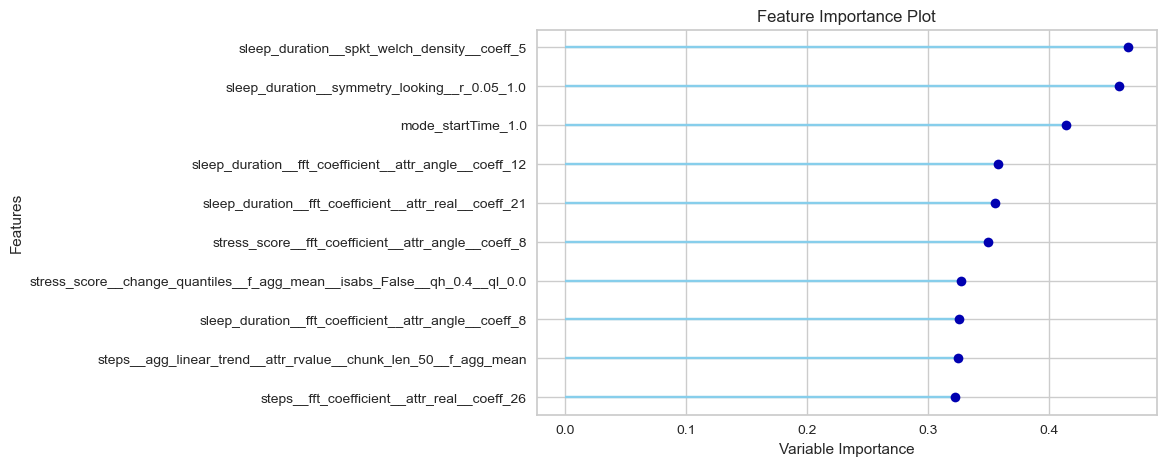

In [24]:
plot_model(tuned_lr, plot = 'feature')

In [25]:
d=pd.DataFrame({'Feature': get_config('X_train').columns, 'Value' : abs(tuned_lr.coef_[0])}).sort_values(by='Value', ascending=False)

In [26]:
d.reset_index(inplace=True)
d=d.head(20)
d = d.drop(columns='index')
d['Label'] = 'intellect'
d = d[['Label', 'Feature', 'Value']]
d.to_pickle('../data/feature_importances/intellect.pkl')
d

,Label,Feature,Value
0,intellect,sleep_duration__spkt_welch_density__coeff_5,0.465342
1,intellect,sleep_duration__symmetry_looking__r_0.05_1.0,0.457616
2,intellect,mode_startTime_1.0,0.413877
3,intellect,sleep_duration__fft_coefficient__attr_angle__c...,0.357983
4,intellect,sleep_duration__fft_coefficient__attr_real__co...,0.355408
5,intellect,stress_score__fft_coefficient__attr_angle__coe...,0.349656
6,intellect,stress_score__change_quantiles__f_agg_mean__is...,0.327311
7,intellect,sleep_duration__fft_coefficient__attr_angle__c...,0.325340
8,intellect,steps__agg_linear_trend__attr_rvalue__chunk_le...,0.324954
9,intellect,steps__fft_coefficient__attr_real__coeff_26,0.322312
